In [174]:
import tensorflow as tf
import numpy as np

We want to train the neural network for the ODE  <br>
we are trying to find a particular solution of second order inhomegenous ode

$$
m * \ddot y + c * \dot y + k * y = g(t),
$$
with $m = 1, c = 0.1$ and $k = 1$. 

Therefore we define an objective 

$$
\mathcal{L}(\mathbf{W}) = \frac{1}{M}\sum_{i=1}^M (m * \ddot y_\mathbf{W}(t_i) + c * \dot y_\mathbf{W}(t_i) + k * y_\mathbf{W}(t_i)) ^ 2 + (y_\mathbf{W}(0) - y_0) ^ 2 + (\dot y_\mathbf{W}(0) - \dot y_0) ^ 2
$$

In [257]:
NN = tf.keras.models.Sequential([
    tf.keras.layers.Input((1,)),
    tf.keras.layers.Dense(units = 32, activation = 'tanh'),
    tf.keras.layers.Dense(units = 1)
])

In [258]:
# NN(0)

In [259]:
a = 1
b = 1
c = 1
y0 = 1.
y0_prime = 0.

In [260]:

def g(t):
    return t
def ode_system(t, net):
    t = t.reshape(-1,1)
    t = tf.constant(t, dtype = tf.float32)
    t_0 = tf.zeros((1,1))
    one = tf.ones((1,1))

    with tf.GradientTape() as tape:
        tape.watch(t)

        u = net(t)
        u_t = tape.gradient(u, t)

    ode_loss = u_t - tf.math.cos(2*np.pi*t)
    IC_loss = net(t_0) - one

In [261]:
from sympy import *
z = Symbol("z")

losses

In [262]:
def inh(t,NN,g):
    t = t.reshape(-1,1)
    t = tf.constant(t, dtype = tf.float32)
    t_0 = tf.zeros((1,1))
    one = tf.ones((1,1))
    
    with tf.GradientTape(persistent=True) as tape:
        tape.watch(t)
        u = NN(t)
        dnn = tape.gradient(u, t)
        ddnn = tape.gradient(dnn,t)
    ode_loss =  (a * ddnn + b * dnn + c * u - g(t))
   
    iv_loss = y0 - NN(t_0) # we preceed with one intital value loss y_prime
    square_loss = tf.square(ode_loss) + tf.square(iv_loss)
    total_loss = tf.reduce_mean(square_loss)
    return total_loss

        
    

In [263]:
train_t = (np.array([0., 0.025, 0.475, 0.5, 0.525, 0.9, 0.95, 1., 1.05, 1.1, 1.4, 1.45, 1.5, 1.55, 1.6, 1.95, 2.])).reshape(-1, 1)
train_loss_record = []

In [264]:

# t = t.reshape(-1,1)
# t = tf.constant(t, dtype = tf.float32)
# t_0 = tf.zeros((1,1))
# one = tf.ones((1,1))

In [265]:
trainable_vars = NN.trainable_variables

train

In [266]:
train_t = (np.array([0., 0.025, 0.475, 0.5, 0.525, 0.9, 0.95, 1., 1.05, 1.1, 1.4, 1.45, 1.5, 1.55, 1.6, 1.95, 2.])).reshape(-1, 1)
train_loss_record1 = []

optimizer = tf.optimizers.SGD(learning_rate=0.01)
epochs = 100 
for _ in range(epochs):
    with tf.GradientTape(persistent=True) as tape: 
        loss = inh(train_t,NN,g)
    grad = tape.gradient(loss, trainable_vars)
    optimizer.apply_gradients(zip(grad, trainable_vars))
    train_loss_record.append(loss)




In [267]:
y_pred = NN.predict(train_t)

1/1 [==============================] - 0s 82ms/step


In [268]:
y_pred

array([[0.8962828 ],
       [0.90066224],
       [0.9711887 ],
       [0.9747185 ],
       [0.9782155 ],
       [1.0275507 ],
       [1.0338025 ],
       [1.0400038 ],
       [1.0461621 ],
       [1.0522842 ],
       [1.0885899 ],
       [1.0946155 ],
       [1.1006441 ],
       [1.1066787 ],
       [1.1127219 ],
       [1.1553956 ],
       [1.1615543 ]], dtype=float32)

In [269]:
import matplotlib.pyplot as plt

plot

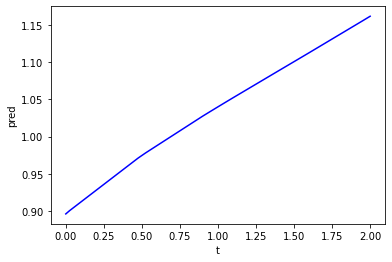

In [270]:

fig, axs = plt.subplots(1)
axs.set_xlabel("t")
axs.set_ylabel("pred")
axs.plot(train_t, y_pred,"b")



harmonischer oszilator
$$
\ddot y + r * \dot y + \omega ^2 * y = B * cos(\Omega * t),
$$

In [329]:
a = 1
b = 1
c = 1
y0 = 1.
y0_prime = 0.


def g(t):
    return np.cos(t) 

In [272]:
NN = tf.keras.models.Sequential([
    tf.keras.layers.Input((1,)),
   tf.keras.layers.Input((1,)),
    tf.keras.layers.Dense(units = 32, activation = 'tanh'),
    tf.keras.layers.Dense(units = 32, activation = 'tanh'), #2 additional layers
    tf.keras.layers.Dense(units = 32, activation = 'tanh'),

    tf.keras.layers.Dense(units = 1)
])

In [273]:
def inh(t,NN,g):
    t = t.reshape(-1,1)
    t = tf.constant(t, dtype = tf.float32)
    t_0 = tf.zeros((1,1))
    one = tf.ones((1,1))
    
    with tf.GradientTape(persistent=True) as tape:
        tape.watch(t)
        u = NN(t)
        dnn = tape.gradient(u, t)
        ddnn = tape.gradient(dnn,t)
    ode_loss =  (a * ddnn + b * dnn + c * u - g(t))
   
    iv_loss = y0 - NN(t_0) # we preceed with one intital value loss y_prime
    square_loss = tf.square(ode_loss) + tf.square(iv_loss)
    total_loss = tf.reduce_mean(square_loss)
    return total_loss

        
    

In [274]:
# one = tf.ones((1,1))
# solution(one)

In [275]:
NN(train_t)

<tf.Tensor: shape=(17, 1), dtype=float32, numpy=
array([[0.        ],
       [0.00823362],
       [0.15211439],
       [0.15965132],
       [0.16712107],
       [0.26993406],
       [0.2822222 ],
       [0.29416358],
       [0.3057582 ],
       [0.3170082 ],
       [0.37749463],
       [0.38646108],
       [0.39512792],
       [0.40350306],
       [0.41159496],
       [0.4609868 ],
       [0.46710464]], dtype=float32)>

In [276]:
trainable_vars = NN.trainable_variables

osz train

In [277]:
train_t = (np.array([0., 0.025, 0.475, 0.5, 0.525, 0.9, 0.95, 1., 1.05, 1.1, 1.4, 1.45, 1.5, 1.55, 1.6, 1.95, 2.])).reshape(-1, 1)
train_loss_record1 = []

optimizer = tf.optimizers.SGD(learning_rate=0.01)
epochs = 300
for _ in range(epochs):
    with tf.GradientTape(persistent=True) as tape: 
        loss = inh(train_t,NN,g)
    grad = tape.gradient(loss, trainable_vars)
    optimizer.apply_gradients(zip(grad, trainable_vars))
    train_loss_record.append(loss)




In [278]:
y_pred = NN.predict(train_t)

1/1 [==============================] - 0s 93ms/step


In [279]:
# y_pred

In [280]:
g,w,r,O,B = 1,1,1,1,1
def solution(t):
    A = 1/(-t**2*O**2 + 1j*r*t*O + w**2)
    Z = A*E**(1j*O*t)
    return  float(re(Z))

In [281]:
[solution(t[0]) for t in train_t]

[1.0,
 1.0003124510107286,
 1.097663838772549,
 1.1051073116552383,
 1.1119664810338747,
 0.9728165850799684,
 0.9094880992017693,
 0.8414709848078965,
 0.7724964297952647,
 0.7057434898079957,
 0.4221478223207986,
 0.39378453062798835,
 0.3692645187728401,
 0.34797984062836984,
 0.3293954300817883,
 0.24440455510582576,
 0.23592579717636852]

In [282]:
#calculated solution
z = symbols("z",real=True)
g,w,r,O,B = 1,1,1,1,1
A = 1/(-z**2*O**2 + I*r*z*O + w**2)
Z = A*E**(I*O*z)
factor( re(A)*re(E**(I*O*z)) )

-(z - 1)*(z + 1)*cos(z)/(z**4 - z**2 + 1)

plot

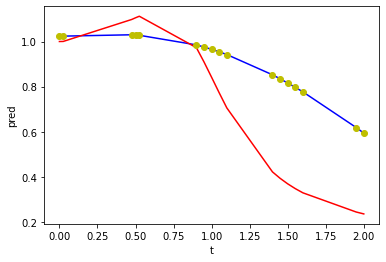

In [283]:

fig, axs = plt.subplots(1)
axs.set_xlabel("t")
axs.set_ylabel("pred")
axs.plot(train_t, y_pred,"b")
axs.plot(train_t, [solution(t[0]) for t in train_t],"r")
axs.plot(train_t, y_pred,"yo")

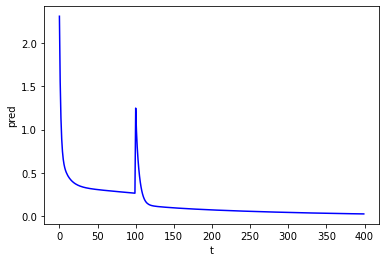

In [284]:

fig, axs = plt.subplots(1)
axs.set_xlabel("t")
axs.set_ylabel("pred")
axs.plot(train_loss_record,"b")

In [285]:
NN.trainable_variables

[<tf.Variable 'dense_40/kernel:0' shape=(1, 32) dtype=float32, numpy=
 array([[-2.8232646e-01,  1.5873156e-01, -4.2189345e-01, -2.5273389e-01,
          1.8191170e-02,  1.6738985e-01, -1.5842885e-01,  4.2904356e-01,
          8.8294379e-02, -9.0938851e-02,  1.6765290e-01,  1.8901895e-01,
          1.5464377e-01, -4.1246310e-01,  4.2916238e-01, -4.6775697e-04,
          2.7542021e-02,  1.9208547e-01, -1.8800578e-01,  3.6047462e-01,
          4.2367774e-01,  3.0145893e-01, -2.7025503e-01,  1.9243950e-01,
         -1.9107653e-01,  4.8257485e-01, -6.2241443e-03,  2.5481969e-02,
         -7.0507467e-02, -8.3977990e-02,  2.6912534e-01,  1.0955085e-01]],
       dtype=float32)>,
 <tf.Variable 'dense_40/bias:0' shape=(32,) dtype=float32, numpy=
 array([ 0.03803923, -0.02919331, -0.03705924,  0.04206348, -0.00571239,
        -0.01954596,  0.04078402,  0.02057167,  0.03311451,  0.0644845 ,
         0.04512893, -0.02860095, -0.05751054,  0.01564023,  0.02350057,
         0.02385801,  0.01337881, -

weiter Lösungen in abhängigkeit von r ?
approximation der Lösung in polyomen


In [286]:
from scipy import integrate

In [287]:
#interpolation polynom y` y`` y

we are trying to make a ansatz of the form $$e^N$$

In [315]:
tf.complex(0.0,1.0)

<tf.Tensor: shape=(), dtype=complex64, numpy=1j>

In [319]:
def inh(t,NN,g):
    t = t.reshape(-1,1)
    t = tf.constant(t, dtype = tf.float32)
    t_0 = tf.zeros((1,1))
    one = tf.ones((1,1))
    
    with tf.GradientTape(persistent=True) as tape:
        tape.watch(t)
        u = tf.exp(NN(t))
        dnn = tape.gradient(u, t)
        ddnn = tape.gradient(dnn,t)
    ode_loss =  (a * ddnn + b * dnn + c * u - g(t))
   
    iv_loss = y0 - NN(t_0) # we preceed with one intital value loss y_prime
    square_loss = tf.square(ode_loss) + tf.square(iv_loss)
    total_loss = tf.reduce_mean(square_loss)
    return total_loss

        
    

In [320]:
train_t = (np.array([0., 0.025, 0.475, 0.5, 0.525, 0.9, 0.95, 1., 1.05, 1.1, 1.4, 1.45, 1.5, 1.55, 1.6, 1.95, 2.])).reshape(-1, 1)
train_loss_record = []

In [321]:
train_t = (np.array([0., 0.025, 0.475, 0.5, 0.525, 0.9, 0.95, 1., 1.05, 1.1, 1.4, 1.45, 1.5, 1.55, 1.6, 1.95, 2.])).reshape(-1, 1)
train_loss_record = []

optimizer = tf.optimizers.SGD(learning_rate=0.01)
epochs = 100 
for _ in range(epochs):
    with tf.GradientTape(persistent=True) as tape: 
        loss = inh(train_t,NN,g)
    grad = tape.gradient(loss, trainable_vars)
    optimizer.apply_gradients(zip(grad, trainable_vars))
    train_loss_record.append(loss)




In [305]:
y_pred = NN.predict(train_t)

1/1 [==============================] - 0s 23ms/step


In [296]:
y_pred

array([[ 0.8132153 ],
       [ 0.7964962 ],
       [ 0.47110966],
       [ 0.45146477],
       [ 0.4316399 ],
       [ 0.11255952],
       [ 0.06704008],
       [ 0.02087498],
       [-0.02590964],
       [-0.07328402],
       [-0.36793095],
       [-0.4183939 ],
       [-0.46912515],
       [-0.5200779 ],
       [-0.5712043 ],
       [-0.9299035 ],
       [-0.98069686]], dtype=float32)

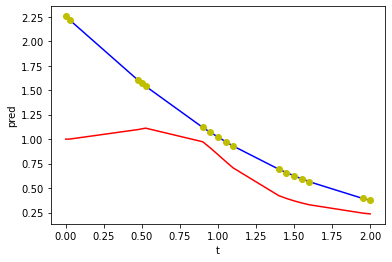

In [297]:
fig, axs = plt.subplots(1)
axs.set_xlabel("t")
axs.set_ylabel("pred")
axs.plot(train_t, tf.exp(y_pred),"b")
axs.plot(train_t, [solution(t[0]) for t in train_t],"r")
axs.plot(train_t,  tf.exp(y_pred),"yo")

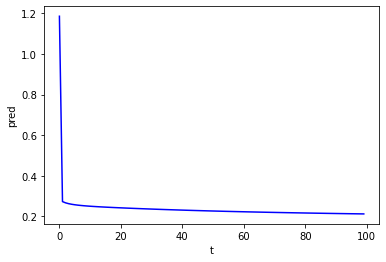

In [300]:

fig, axs = plt.subplots(1)
axs.set_xlabel("t")
axs.set_ylabel("pred")

axs.plot(train_loss_record,"b")
axs.plot(train_loss_record1,"r")

simulatinious training

In [323]:
NN__2 = tf.keras.models.Sequential([
    tf.keras.layers.Input((1,)),
    tf.keras.layers.Dense(units = 32, activation = 'tanh'),
    tf.keras.layers.Dense(units = 1)
])

In [348]:
def inh(t,NN,NN__2,g):
    t = t.reshape(-1,1)
    t = tf.constant(t, dtype = tf.float32)
    t_0 = tf.zeros((1,1))
    one = tf.ones((1,1))
    
    with tf.GradientTape(persistent=True) as tape:
        tape.watch(t)
        u = NN(t)
        v = NN__2(t)
        o = NN(t) * tf.exp (NN__2(t))
        dnn = tape.gradient(o, t)
        ddnn = tape.gradient(dnn,t)
    ode_loss =  (a * ddnn + b * dnn + c * u - g(t))
   
    iv_loss = y0 - NN(t_0) # we preceed with one intital value loss y_prime
    square_loss = tf.square(ode_loss) + tf.square(iv_loss)
    total_loss = tf.reduce_mean(square_loss)
    return total_loss

        
    

In [349]:
train_t = (np.array([0., 0.025, 0.475, 0.5, 0.525, 0.9, 0.95, 1., 1.05, 1.1, 1.4, 1.45, 1.5, 1.55, 1.6, 1.95, 2.])).reshape(-1, 1)
train_loss_record = []

In [350]:
train_t = (np.array([0., 0.025, 0.475, 0.5, 0.525, 0.9, 0.95, 1., 1.05, 1.1, 1.4, 1.45, 1.5, 1.55, 1.6, 1.95, 2.])).reshape(-1, 1)
train_loss_record = []

optimizer = tf.optimizers.SGD(learning_rate=0.01)
epochs = 100 
for _ in range(epochs):
    with tf.GradientTape(persistent=True) as tape: 
        loss = inh(train_t,NN,NN__2,g)
    grad = tape.gradient(loss, trainable_vars)
    optimizer.apply_gradients(zip(grad, trainable_vars))
    train_loss_record.append(loss)




In [346]:
y_pred1 = NN.predict(train_t)
y_pred2  = NN__2.predict(train_t)

1/1 [==============================] - 0s 30ms/step


1/1 [==============================] - 0s 28ms/step


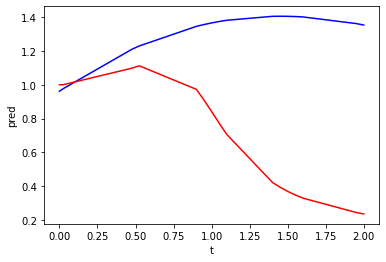

In [351]:
def ansatz(t):
    u = tf.cos(NN(t))
    v = tf.sin(NN__2(t))
    return u + v
fig, axs = plt.subplots(1)
axs.set_xlabel("t")
axs.set_ylabel("pred")
axs.plot(train_t, y_pred1 * tf.exp(y_pred2) ,"b")
axs.plot(train_t, [solution(t[0]) for t in train_t],"r")
# axs.plot(train_t, tf.sin(y_pred1) + tf.cos(y_pred2) ,"yb")